In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geodatasets
from geodatasets import get_path
import folium
from folium.plugins import HeatMap

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
#importing the files 
Restaurant_Data = pd.read_csv("F:/Internship/Cognifyz Technologies Internship/Dataset .csv")

In [3]:
df = Restaurant_Data
print(df.shape)
print(df.columns)

NameError: name 'Restaurant_Data' is not defined

<font size="7">Level-2</font>

<font size="6">Task-1: Restaurant Ratings</font>

<font size="4">(1) Analyze the Distribution of Aggregate Ratings and  determine the Most Common Rating Range</font>

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


C:\Users\Deeksha Salame\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


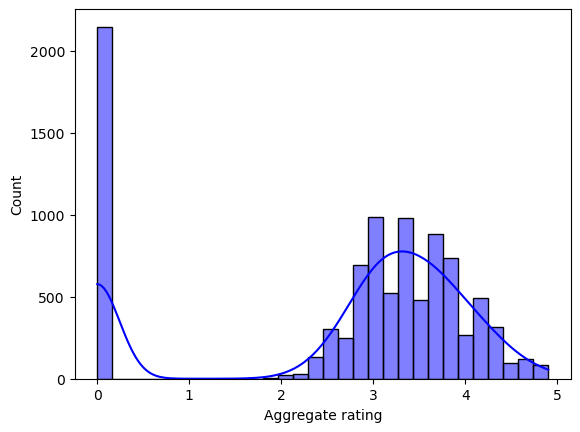

In [5]:
Aggregate_Rating_Distribution = df['Aggregate rating'].value_counts()
print(Aggregate_Rating_Distribution)
sns.histplot(df['Aggregate rating'], bins=30, kde= True,color='blue')
plt.xlabel('Aggregate rating')
plt.ylabel('Count')

plt.show()

<font size="4">(2) Calculate the average number of votes received by restaurants</font>

In [6]:
Avg_Votes = round(df['Votes'].mean(),3)
print('The Average Number of Votes received by Restaurants:', Avg_Votes) 

The Average Number of Votes received by Restaurants: 156.91


<font size="6">Task-2: Cuisine Combination</font>

<font size="4">(1) Identify the most common combinations of cuisines in the dataset</font>

In [7]:
common_combinations = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
Top_Combinations = common_combinations.head(10)
print('Top-10 Common Cobinations of Cuisines :', Top_Combinations)

Top-10 Common Cobinations of Cuisines : Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64


<font size="4">(2) Determine if certain cuisine combinations tend to have higher ratings</font>

In [8]:
Maximum_Rating = Top_Combinations.max()
print('Highest Rating is :', Maximum_Rating)

Highest Rating is : 4.9


<font size="6">Task-3: Geographic Analysis</font>

<font size="4">(1) Plot the locations of restaurants on a map using longitude and latitude 
coordinates</font>

In [9]:
print(df[["Longitude", "Latitude"]])

       Longitude   Latitude
0     121.027535  14.565443
1     121.014101  14.553708
2     121.056831  14.581404
3     121.056475  14.585318
4     121.057508  14.584450
...          ...        ...
9546   28.977392  41.022793
9547   29.041297  41.009847
9548   29.034640  41.055817
9549   29.036019  41.057979
9550   29.026016  40.984776

[9551 rows x 2 columns]


In [10]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
print(gdf.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

<Axes: >

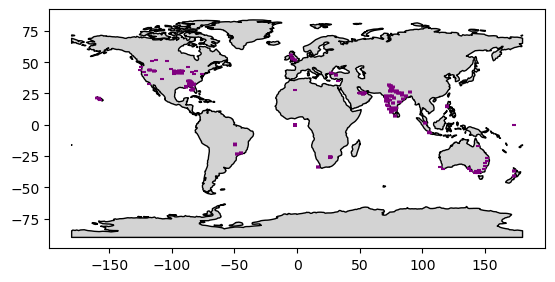

In [11]:
world = gpd.read_file(get_path('naturalearth_land'))
ax = world.plot(color='lightgray', edgecolor = 'black')
gdf.plot(ax=ax, marker= 0, color='purple', markersize=8)


<font size="4">(2) Identify any patterns or clusters of restaurants in specific areas</font>

In [22]:
world_map = folium.Map(location=[df['Longitude'].mean(), df['Latitude'].mean()],zoom_start=1, heights= '100%' , width = '100%')

In [13]:
heat_marker = [[row['Longitude'], row['Latitude']] for i, row in df.iterrows()]
HeatMap(heat_marker, radius = 10).add_to(world_map)
world_map

<font size="6">Task-4: Restaurant Chains</font>

<font size="4">(1) Identify if there are any restaurant chains present in the dataset</font>

In [21]:
restaurant_chains = df.groupby('Restaurant Name').size().reset_index(name= 'OutletCount')
new = restaurant_chains[restaurant_chains['OutletCount'] > 1]
restaurant_chains = new.sort_values(by= 'OutletCount', ascending = False)      
print(restaurant_chains[['Restaurant Name', 'OutletCount']].head(5))

       Restaurant Name  OutletCount
1098   Cafe Coffee Day           83
2098    Domino's Pizza           79
6106            Subway           63
2716  Green Chick Chop           51
4077        McDonald's           48


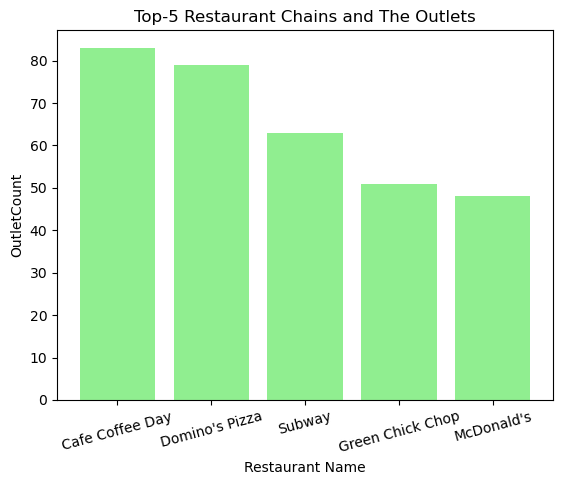

In [32]:
plt.bar(restaurant_chains['Restaurant Name'][:5],restaurant_chains['OutletCount'][:5], color='lightgreen')
plt.xlabel('Restaurant Name')
plt.ylabel('OutletCount')
plt.title('Top-5 Restaurant Chains and The Outlets')
plt.xticks(rotation = 15)
plt.show()

<font size="4">(2) Analyze the ratings and popularity of different restaurant chains</font>

In [16]:
Ratings = df.groupby('Restaurant Name')["Aggregate rating"].mean().reset_index(name="Average rating").sort_values(by="Average rating", ascending=False)
print(Ratings)                                                                                                                

                      Restaurant Name  Average rating
5322   Restaurant Mosaic @ The Orient             4.9
4177                 Ministry of Crab             4.9
4135                            Miann             4.9
5757          Shorts Burger and Shine             4.9
4165                            Milse             4.9
...                               ...             ...
1105                      Cafe Corner             0.0
4905                  Pheva Tandooris             0.0
4913                     Pick & Carry             0.0
1096                     Cafe Brownie             0.0
2292  Famous Parantha and Poori Sabzi             0.0

[7446 rows x 2 columns]


In [17]:
votes = df.groupby('Restaurant Name')["Votes"].sum().reset_index(name="Total Votes").sort_values(by="Total Votes", ascending=False)
print(votes)   

                Restaurant Name  Total Votes
663             Barbeque Nation        28142
101   AB's - Absolute Barbecues        13400
6943                       Toit        10934
785                   Big Chill        10853
2297                 Farzi Cafe        10098
...                         ...          ...
4375                  Muncheezz            0
6217            Swiss Gourmessa            0
2110      Dosa and Pizza Corner            0
6215            Sweets n Treats            0
2433               Food Station            0

[7446 rows x 2 columns]


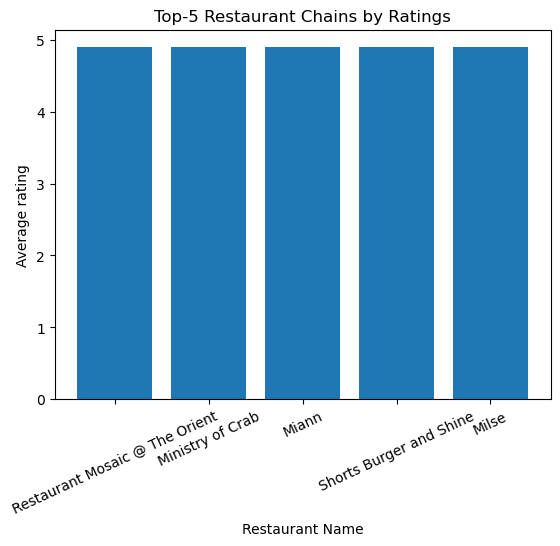

In [34]:
plt.bar(Ratings['Restaurant Name'][:5],Ratings['Average rating'][:5])
plt.xlabel('Restaurant Name')
plt.ylabel('Average rating')
plt.title('Top-5 Restaurant Chains by Ratings')
plt.xticks(rotation = 25)
plt.show()    